In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Loan Prediction Dataset.csv")

In [3]:

df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
48,LP001146,Female,Yes,0,Graduate,No,2645,3440.0,120.0,360.0,0.0,Urban,N
83,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,N
146,LP001516,Female,Yes,2,Graduate,No,14866,0.0,70.0,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
270,LP001888,Female,No,0,Graduate,No,3237,0.0,30.0,360.0,1.0,Urban,Y
213,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,Y
575,LP002868,Male,Yes,2,Graduate,No,3159,461.0,108.0,84.0,1.0,Urban,Y
21,LP001046,Male,Yes,1,Graduate,No,5955,5625.0,315.0,360.0,1.0,Urban,Y
206,LP001693,Female,No,0,Graduate,No,3244,0.0,80.0,360.0,1.0,Urban,Y
592,LP002933,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df['Loan_ID'].nunique()

614

In [6]:
df['Gender'].nunique()

2

In [7]:
df['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [8]:
import sweetviz as sv
report = sv.analyze(df)

# Show the report in your browser
#report.show_html('loan')

                                             |      | [  0%]   00:00 -> (? left)

In [9]:
df['Married'].nunique()

2

In [10]:
df['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [11]:
df['Dependents'].nunique()

4

In [12]:
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [13]:
df['Education'].nunique()

2

In [14]:
df['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [15]:
df['Self_Employed'].nunique()

2

In [16]:
df['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [17]:
df['Loan_Amount_Term'].nunique()

10

In [18]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [19]:
df['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [20]:
df['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [21]:
df['Property_Area'].nunique()

3

In [22]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [23]:
from ydata_profiling import ProfileReport

In [24]:
pr=ProfileReport(df)
pr.to_file('loan.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# EDA

In [26]:
Continuous=['ApplicantIncome','CoapplicantIncome','LoanAmount']
Discrete_categorical=['Gender',	'Married','Education','Self_Employed','Credit_History','Loan_Status','Property_Area']
Discrete_cout=['Dependents','Loan_Amount_Term']

In [27]:
df[Continuous].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


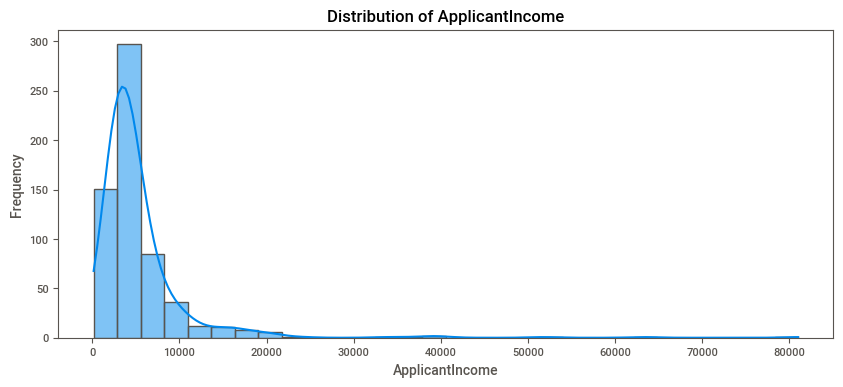

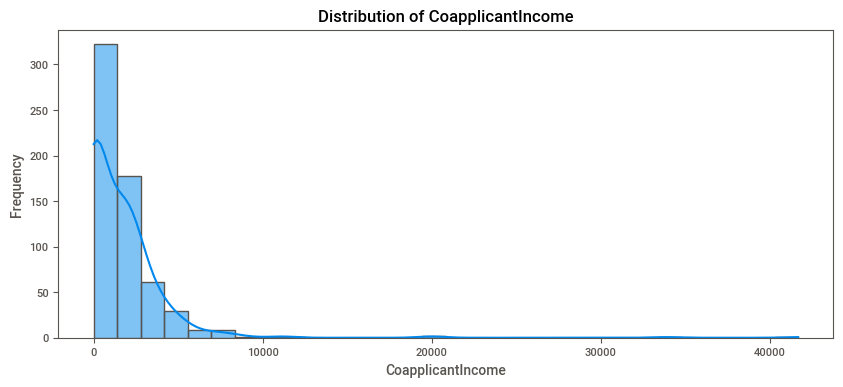

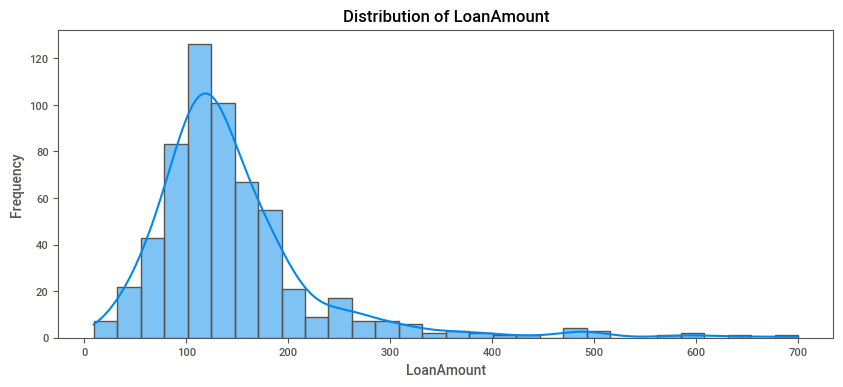

In [28]:



for i in Continuous:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[i], kde=True, bins=30)
    plt.title(f'Distribution of {i}')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()


<Axes: >

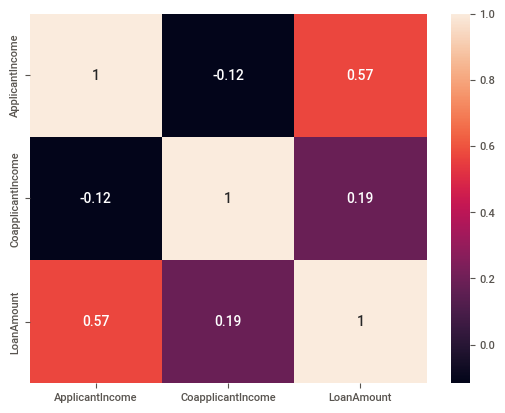

In [29]:
sns.heatmap(df[Continuous].corr(),annot=True)

In [30]:
df[Continuous].skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
dtype: float64

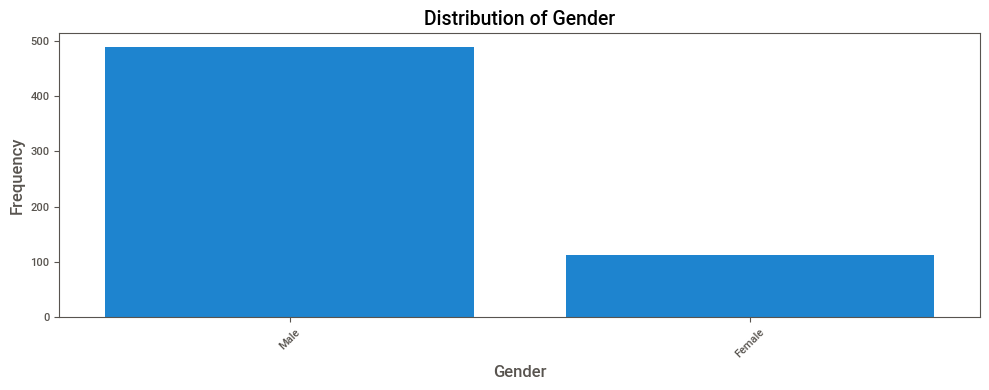

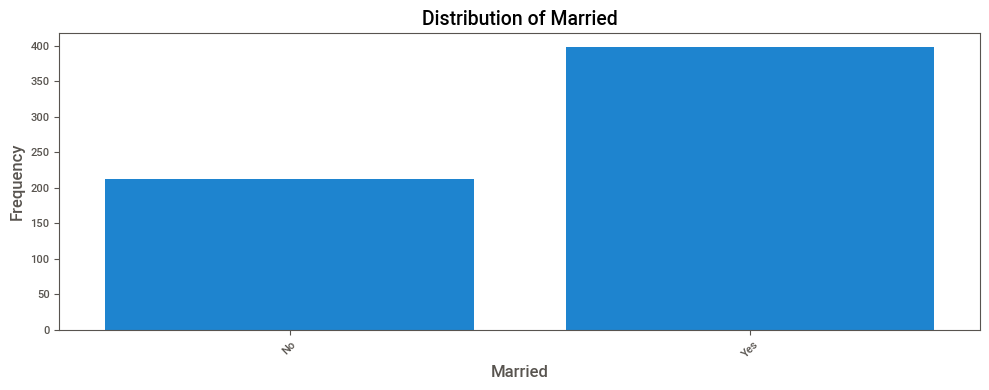

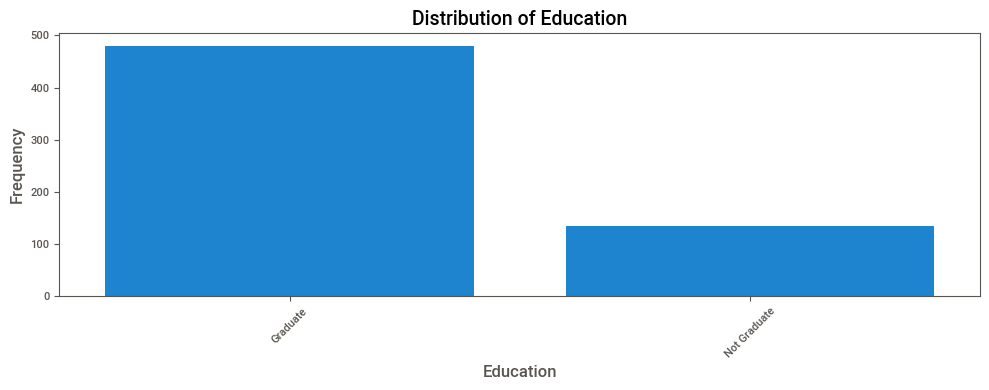

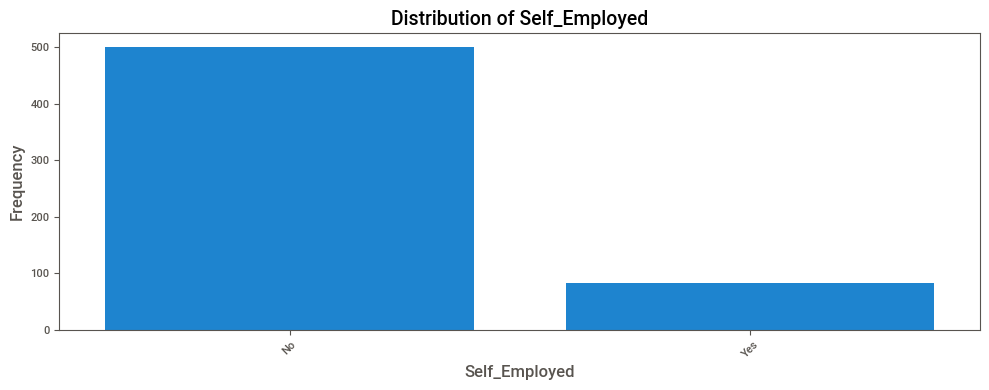

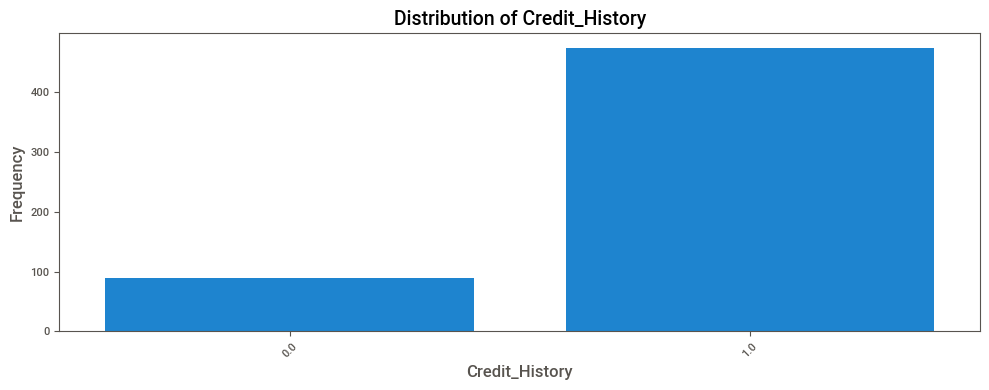

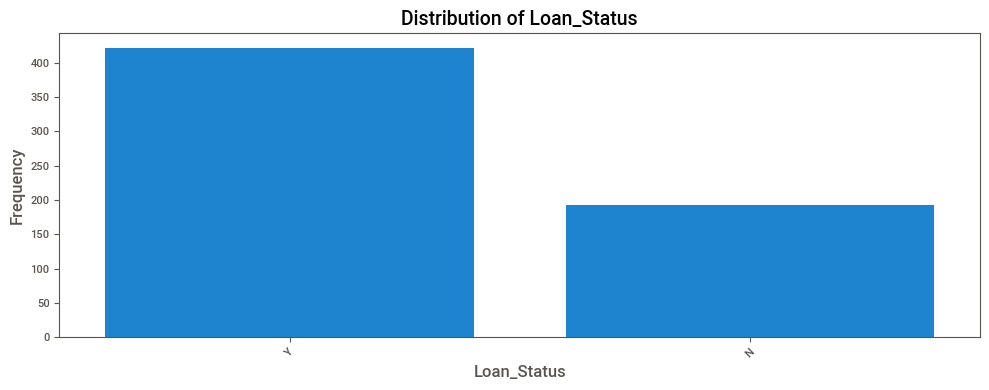

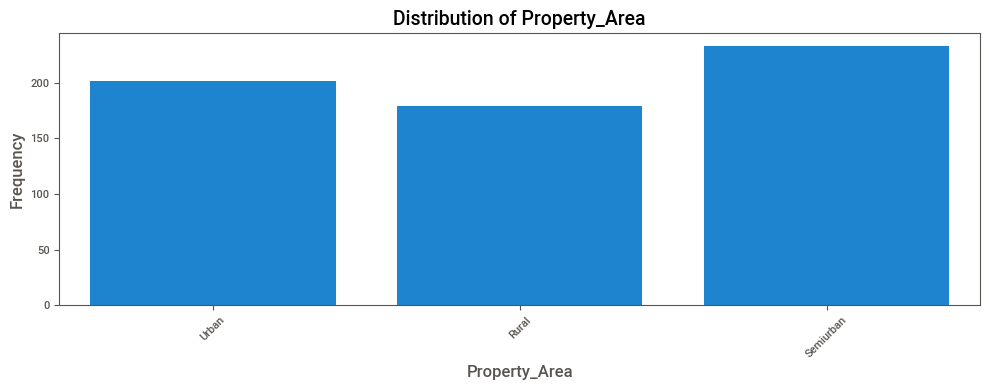

In [31]:
for i in Discrete_categorical:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=i)  # Specify the DataFrame with 'data'
    plt.title(f'Distribution of {i}', fontsize=14)
    plt.xlabel(i, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.tight_layout()  # Adjust layout
    plt.show()


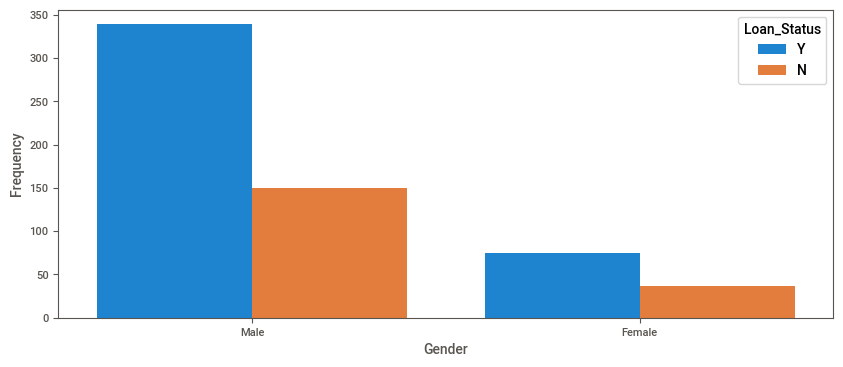

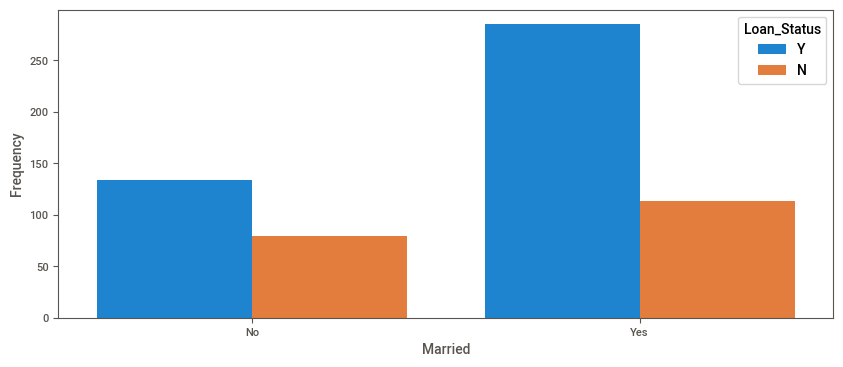

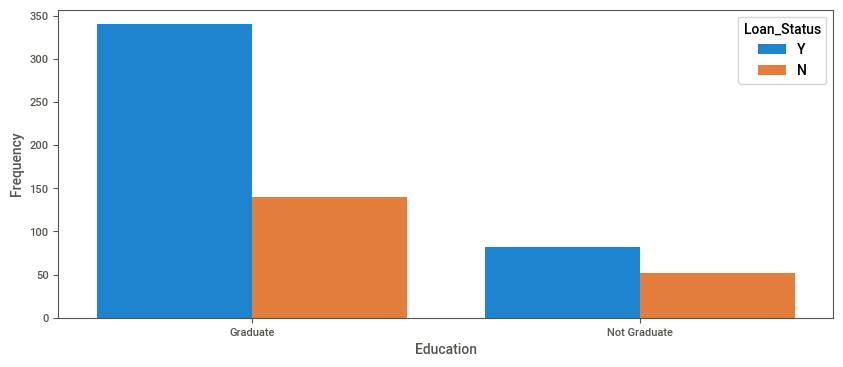

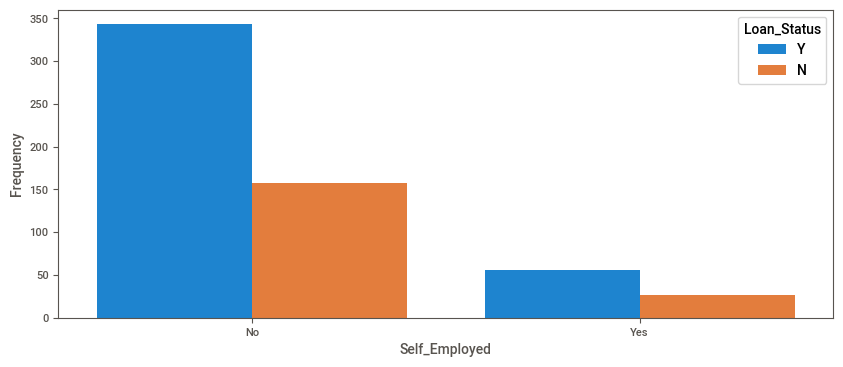

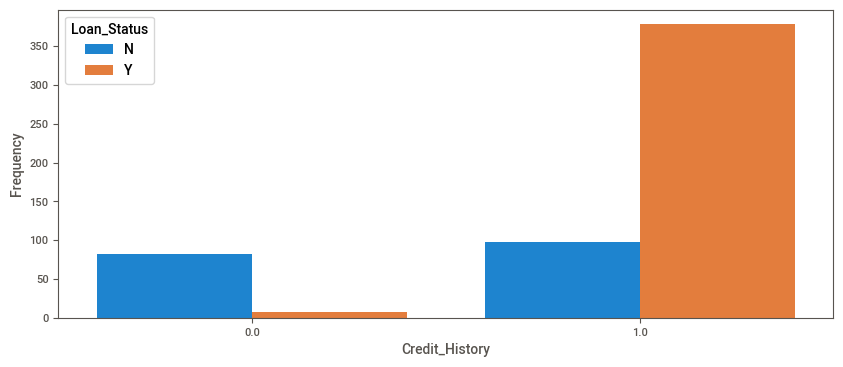

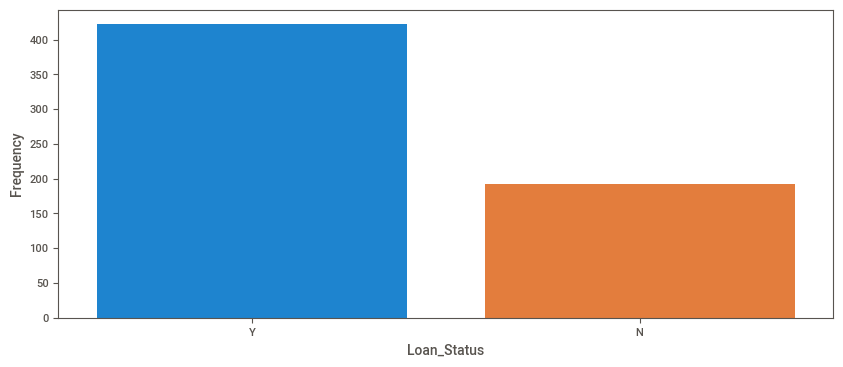

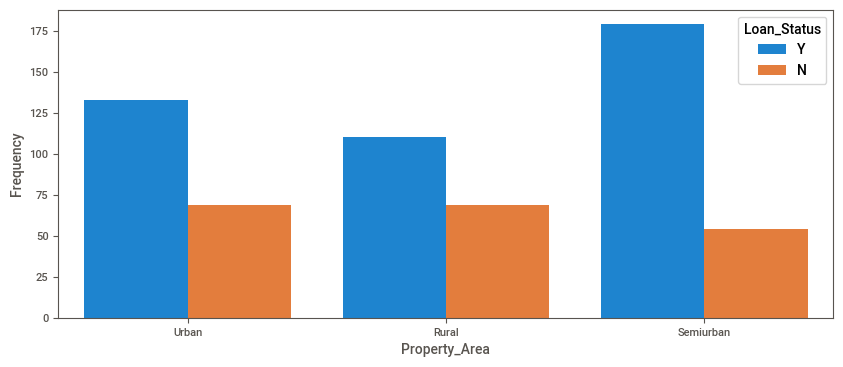

In [32]:
for i in Discrete_categorical:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df,x=df[i],hue='Loan_Status')
    
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()

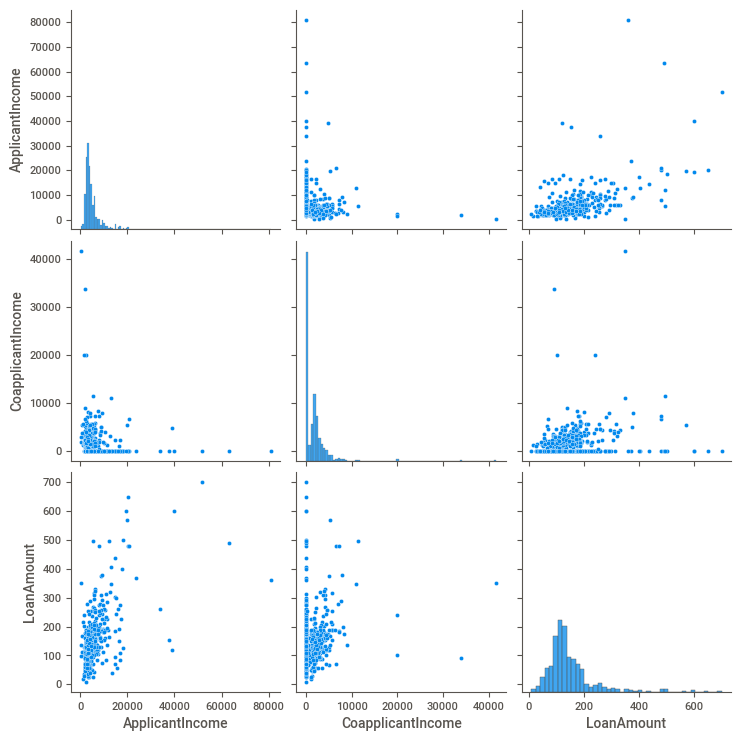

In [33]:
sns.pairplot(df[Continuous])
plt.show()

In [34]:
df[Discrete_categorical].describe(include='O')

,Gender,Married,Education,Self_Employed,Loan_Status,Property_Area
count,601,611,614,582,614,614
unique,2,2,2,2,2,3
top,Male,Yes,Graduate,No,Y,Semiurban
freq,489,398,480,500,422,233


# feature engineering

In [36]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

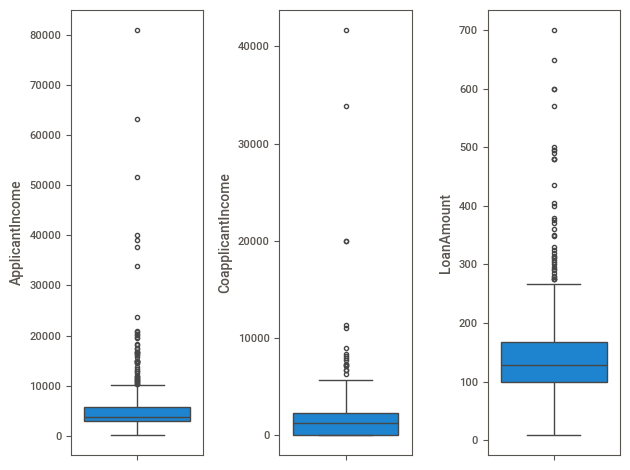

In [37]:
plt.subplot(1,3,1)
sns.boxplot(df['ApplicantIncome'])
plt.subplot(1,3,2)
sns.boxplot(df['CoapplicantIncome'])
plt.subplot(1,3,3)
sns.boxplot(df['LoanAmount'])
plt.tight_layout()

In [38]:
df['Income']=df['ApplicantIncome']+df['CoapplicantIncome']
df.drop(columns=['ApplicantIncome','CoapplicantIncome'],inplace=True)

In [39]:
df.drop('Loan_ID',inplace=True,axis=1)

In [40]:
df['Dependents']=df['Dependents'].replace({'3+':3})

In [41]:
df=df.dropna(subset=['Income','LoanAmount','Credit_History','Loan_Amount_Term'])

In [42]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(0)
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])


# Encoding

In [44]:
df['Gender']=df['Gender'].map({'Male' :1,"Female":0}).astype(int)
df['Married']=df['Married'].map({'Yes' :1,"No":0}).astype(int)
df['Education']=df['Education'].map({'Graduate' :1,"Not Graduate":0}).astype(int)
df['Self_Employed']=df['Self_Employed'].map({'Yes' :1,"No":0}).astype(int)
df['Property_Area']=df['Property_Area'].map({'Urban':2,'Semiurban' :1,"Rural":0}).astype(int)
df['Loan_Status']=df['Loan_Status'].map({'Y':1,'N':0}).astype(int)


In [45]:
df['Dependents']=df['Dependents'].astype(int)

# transformations

In [47]:
df[['Income',"LoanAmount"]].skew()

Income        5.777628
LoanAmount    2.607945
dtype: float64

In [48]:
from scipy.stats import boxcox
df['Income'],a=boxcox(df['Income'])
df['LoanAmount'],c=boxcox(df['LoanAmount'])

In [49]:
df[['Income',"LoanAmount"]].skew()

Income       -0.027769
LoanAmount    0.038289
dtype: float64

In [50]:
df['Loan_Amount_Term']=df['Loan_Amount_Term']/12

In [51]:
df

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,1,1,1,1,0,6.243267,30.0,1.0,0,0,1.864967
2,1,1,0,1,1,5.202610,30.0,1.0,2,1,1.856556
3,1,1,0,0,0,6.138816,30.0,1.0,2,1,1.862802
4,1,0,0,1,0,6.401083,30.0,1.0,2,1,1.864819
5,1,1,2,1,1,7.481931,30.0,1.0,2,1,1.868932
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,5.313992,30.0,1.0,0,1,1.856068
610,1,1,3,1,0,4.460305,15.0,1.0,0,1,1.860675
611,1,1,1,1,0,7.388071,30.0,1.0,2,1,1.867771
612,1,1,2,1,0,6.870558,30.0,1.0,2,1,1.866991


In [52]:
df.sample(15)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
499,1,0,0,1,0,7.059165,30.0,0.0,0,0,1.869731
33,1,1,0,1,0,6.056281,30.0,1.0,1,1,1.863285
283,0,0,0,1,0,4.900688,30.0,1.0,2,1,1.858578
547,1,0,0,1,0,6.447008,30.0,1.0,0,1,1.861250
426,0,0,1,0,0,5.517040,30.0,1.0,0,0,1.862020
104,1,1,0,1,0,6.609642,30.0,1.0,2,1,1.861931
476,1,1,2,1,0,7.223208,25.0,1.0,1,1,1.867907
286,0,0,0,1,1,5.831442,25.0,1.0,1,0,1.861272
6,1,1,0,0,0,5.766309,30.0,1.0,2,1,1.859882
372,1,1,2,1,1,8.109620,25.0,1.0,0,1,1.872774


In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('Loan_Status',axis=1),df['Loan_Status'],test_size=0.2,random_state=6)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Initialize Logistic Regression model
model = LogisticRegression()

# Variables to track the best random state and accuracy
best_state = None
best_accuracy = 0

# Loop to test different random states
for state in range(100):
    # Split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(
        df.drop('Loan_Status', axis=1),  # Features
        df['Loan_Status'],              # Target
        random_state=state              # Random state
    )
    
    # Fit the model on the training data
    model.fit(x_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(x_test)
    
    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    
    # Update best accuracy and state if current one is better
    if acc > best_accuracy:
        best_accuracy = acc
        best_state = state

# Print the results
print(f"Best random state: {best_state} with accuracy: {best_accuracy}")


Best random state: 6 with accuracy: 0.8872180451127819


# modeling and evaluaton


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 

In [57]:
models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier()
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.8030
- F1 score: 0.7789
- Precision: 0.7821
- Recall: 0.9813
- Roc Auc Score: 0.7077
----------------------------------
Model performance for Test set
- Accuracy: 0.8496
- F1 score: 0.8321
- Precision: 0.8435
- Recall: 0.9798
- Roc Auc Score: 0.7252


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7519
- F1 score: 0.7552
- Precision: 0.8438
- Recall: 0.8182
- Roc Auc Score: 0.6885


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8195
- F1 score: 0.8135
- Precision: 0.8571
- Recall: 0.9091
- Roc Auc Score: 0.7340


Gradient Boost
Model performance for Training se

In [58]:
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [59]:
randomcv_models = [
                   ("RF", RandomForestClassifier(), rf_params)
                   
                   ]

In [60]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(x_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits
---------------- Best Params for RF -------------------
{'n_estimators': 100, 'min_samples_split': 20, 'max_features': 8, 'max_depth': 15}


In [123]:
models={
    
    "Random Forest":RandomForestClassifier(n_estimators=100,min_samples_split=20,
                                          max_features=8,max_depth=15)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    
    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 0.8510
- F1 score: 0.8428
- Precision: 0.8399
- Recall: 0.9625
- Roc Auc Score: 0.7914
----------------------------------
Model performance for Test set
- Accuracy: 0.8346
- F1 score: 0.8243
- Precision: 0.8532
- Recall: 0.9394
- Roc Auc Score: 0.7344




# hyperparameter tuningfor Logistic Regression

In [63]:
# Import necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import numpy as np


log_reg = LogisticRegression(max_iter=1000)

# Define hyperparameter grid
param_grid = {
    'C': [0.001, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs'],
}


grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Best hyperparameters found by GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate on training set
y_train_pred = best_model.predict(x_train)
train_acc = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_acc * 100:.2f}%")

# Evaluate on test set
y_test_pred = best_model.predict(x_test)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Perform cross-validation
cv_scores = cross_val_score(best_model, x_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average Cross-Validation Accuracy: {np.mean(cv_scores) * 100:.2f}%")




Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Training Accuracy: 80.30%
Test Accuracy: 84.96%
Cross-Validation Scores: [0.8        0.79746835 0.79746835 0.79746835 0.82278481]
Average Cross-Validation Accuracy: 80.30%
